In [1]:
# load and summarize the housing dataset
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np

# load dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
metacritic = pd.read_csv(('..//metacritic_vader_2.csv'))
# summarize shape
print(metacritic.shape)
# summarize first few lines
print(metacritic.head())

(964, 7)
   Unnamed: 0     imDbId       title          fullTitle  year  \
0           0  tt1877830  The Batman  The Batman (2022)  2022   
1           1  tt1877830  The Batman  The Batman (2022)  2022   
2           2  tt1877830  The Batman  The Batman (2022)  2022   
3           3  tt1877830  The Batman  The Batman (2022)  2022   
4           4  tt1877830  The Batman  The Batman (2022)  2022   

                                               items  sentiment_score  
0  {'publisher': 'IGN', 'author': '', 'link': '',...             0.48  
1  {'publisher': 'Slashfilm', 'author': 'Chris Ev...             0.00  
2  {'publisher': 'TheWrap', 'author': 'Todd Gilch...             0.59  
3  {'publisher': 'Consequence', 'author': 'Liz Sh...             0.90  
4  {'publisher': 'Screen Rant', 'author': 'Mae Ab...             0.68  


In [2]:
imdb = read_csv('..//ratings_clean.csv')
data = metacritic.merge(imdb, on =['imDbId', 'year', 'title', 'fullTitle'])
data

,Unnamed: 0,imDbId,title,fullTitle,year,items,sentiment_score,type,imDb
0,0,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'IGN', 'author': '', 'link': '',...",0.48,Movie,8.2
1,1,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Slashfilm', 'author': 'Chris Ev...",0.00,Movie,8.2
2,2,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'TheWrap', 'author': 'Todd Gilch...",0.59,Movie,8.2
3,3,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Consequence', 'author': 'Liz Sh...",0.90,Movie,8.2
4,4,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Screen Rant', 'author': 'Mae Ab...",0.68,Movie,8.2
...,...,...,...,...,...,...,...,...,...
989,959,tt1386697,Suicide Squad,Suicide Squad (2016),2016,"{'publisher': 'Screen Daily', 'author': 'Tim G...",-0.00,Movie,5.9
990,960,tt1386697,Suicide Squad,Suicide Squad (2016),2016,"{'publisher': 'The Hollywood Reporter', 'autho...",-0.83,Movie,5.9
991,961,tt1386697,Suicide Squad,Suicide Squad (2016),2016,"{'publisher': 'The Telegraph', 'author': 'Robb...",-0.45,Movie,5.9
992,962,tt1386697,Suicide Squad,Suicide Squad (2016),2016,"{'publisher': 'IndieWire', 'author': 'David Eh...",-0.67,Movie,5.9


In [3]:
wordembed = read_csv('..//doc_reduction.csv')
dataset = data.merge(wordembed)

In [4]:
dataset.head()

,Unnamed: 0,imDbId,title,fullTitle,year,items,sentiment_score,type,imDb,0,...,90,91,92,93,94,95,96,97,98,99
0,0,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'IGN', 'author': '', 'link': '',...",0.48,Movie,8.2,-0.141278,...,0.384271,0.053703,0.133402,0.038676,0.356207,0.240899,0.119453,-0.215866,-0.052767,0.005125
1,1,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Slashfilm', 'author': 'Chris Ev...",0.00,Movie,8.2,-0.141278,...,0.384271,0.053703,0.133402,0.038676,0.356207,0.240899,0.119453,-0.215866,-0.052767,0.005125
2,2,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'TheWrap', 'author': 'Todd Gilch...",0.59,Movie,8.2,-0.141278,...,0.384271,0.053703,0.133402,0.038676,0.356207,0.240899,0.119453,-0.215866,-0.052767,0.005125
3,3,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Consequence', 'author': 'Liz Sh...",0.90,Movie,8.2,-0.141278,...,0.384271,0.053703,0.133402,0.038676,0.356207,0.240899,0.119453,-0.215866,-0.052767,0.005125
4,4,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Screen Rant', 'author': 'Mae Ab...",0.68,Movie,8.2,-0.141278,...,0.384271,0.053703,0.133402,0.038676,0.356207,0.240899,0.119453,-0.215866,-0.052767,0.005125


In [5]:
ex = dataset.groupby(['imDbId','title']).mean()
ex = ex.drop(['Unnamed: 0','year'], axis = 1)
ex.head()

,,sentiment_score,imDb,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
imDbId,title,,,,,,,,,,,,,,,,,,,,,
tt0451279,Wonder Woman,0.555,7.4,-0.028568,0.054156,0.001724,0.017337,0.018928,-0.070442,0.025169,0.106089,...,0.092024,0.006757,0.033801,0.016057,0.083564,0.053319,0.030094,-0.051786,-0.013009,-0.000273
tt0870154,Jungle Cruise,0.626,6.6,-0.020787,0.043177,-0.001567,0.020637,0.004898,-0.050922,0.016218,0.071488,...,0.061267,0.016949,0.022872,0.001438,0.070665,0.043779,0.020181,-0.030818,-0.013960,0.004204
tt0974015,Justice League,0.519,6.1,-0.022020,0.029992,0.000049,0.013619,0.008935,-0.050710,0.017899,0.063337,...,0.057290,0.005288,0.016406,0.012495,0.044413,0.028252,0.013060,-0.045285,-0.006964,-0.006046
tt1070874,The Trial of the Chicago 7,0.273,7.7,-0.066886,0.106224,0.016620,0.062157,0.036521,-0.170192,0.061907,0.242479,...,0.195614,0.044438,0.078722,0.027435,0.208348,0.132558,0.065598,-0.111773,-0.024694,0.002019
tt10838180,The Matrix Resurrections,0.009,5.7,-0.025165,0.026692,-0.003870,-0.000133,0.012202,-0.049759,0.029350,0.070549,...,0.057389,0.006889,0.011367,0.006340,0.041136,0.030643,0.013884,-0.038242,-0.024434,-0.002159


In [6]:
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

y = ex.imDb
X = ex.drop(columns = ['imDb'])
print(X.head())
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#print(X_train)
# Create an instance of Lasso Regression implementation
#
lasso = Lasso(alpha=0.1)
#
# Fit the Lasso model
#
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
#
# Create the model score
print(lasso.coef_)
print(lasso.intercept_)
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))
print(metrics.mean_absolute_error(y_test,y_pred))

                                       sentiment_score         0         1  \
imDbId     title                                                             
tt0451279  Wonder Woman                          0.555 -0.028568  0.054156   
tt0870154  Jungle Cruise                         0.626 -0.020787  0.043177   
tt0974015  Justice League                        0.519 -0.022020  0.029992   
tt1070874  The Trial of the Chicago 7            0.273 -0.066886  0.106224   
tt10838180 The Matrix Resurrections              0.009 -0.025165  0.026692   

                                              2         3         4         5  \
imDbId     title                                                                
tt0451279  Wonder Woman                0.001724  0.017337  0.018928 -0.070442   
tt0870154  Jungle Cruise              -0.001567  0.020637  0.004898 -0.050922   
tt0974015  Justice League              0.000049  0.013619  0.008935 -0.050710   
tt1070874  The Trial of the Chicago 7  0.016620 

C:\Users\markl\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


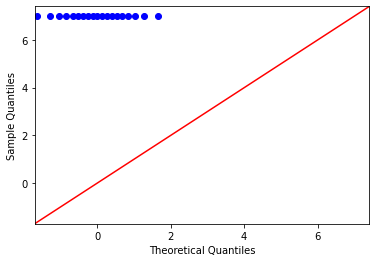

In [7]:
import numpy as np
import statsmodels.api as sm
import pylab as py
#data_points = np.random.normal(0, 1, 100)    
  
sm.qqplot(y_pred, line ='45')
py.show()

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)
y_dasdf = reg.predict(X)
print(metrics.mean_absolute_error(y_dasdf, y))
reg.score(X, y)

[   3.125       155.82750017  -52.33256799   48.61160103  -46.38422227
  -87.3304387    31.85844598   17.64961712   48.82719701  -74.20816188
   16.58852219  109.99836326  -25.96606405 -138.22936396  -76.51897758
  144.86067928  -42.31246728  -12.96662985   17.48459861   23.96318811
   77.450266      5.68494731  121.68638636  -91.34725306  158.0895427
  -76.94821599  -60.29836706 -198.89187461   -5.63604242   43.67592517
  180.14304775  -51.47793795    5.86652339  -38.75774607  105.80694826
   44.03615401    1.04683072  108.54624697   17.33683013  -24.66094341
   96.53081506   69.25109052  -49.64594514  115.96991661  102.12564127
  121.96770321   21.71462412 -164.03979046   59.51726859  177.23431581
   93.67701814   50.01406245   -1.58838821   46.74360023  -74.23295794
  -31.29660578   37.16866085   44.19338413  -47.08045536   -9.77694939
    0.82903106   85.68949949  -69.30143659    8.96575274   20.36669063
 -122.39245337   23.5537709  -206.27158587  -73.12111545   80.80188746
   46.5

1.0

In [9]:
y_pred = reg.predict(X)
plt.scatter(X['compound'], y, color="blue", linewidth=3)
z = np.polyfit(X['compound'], y, 1)
p = np.poly1d(z)
plt(X['compound'],p(X[]),"r--")
plt.xticks(())
plt.yticks(())

plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_4440/1753976388.py, line 5)

In [ ]:
np.reshape()